# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 8.7 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.25.2 which is incompatible.
xarray 2025.1.2 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
langchain 0.3.19 requires nu

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [6]:

df = pd.read_csv('foodhub_order.csv')

In [7]:

df = pd.read_csv('foodhub_order.csv')

In [29]:

df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [8]:

df.shape

(1898, 9)

**The dataframe has 1898 rows and 9 coloumns.**

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [9]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
**rating is not object. Rating should be integer but because there is 'Not Given' in the rating, we see data type as object. which when we want to use it later sgould be convert it to int..**

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [10]:
# Write your code here
#no missing data

#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [11]:
# Write your code here
summary= df['food_preparation_time'].describe()
print(summary)

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64


#### Observations: the average time of the preparation of the food is 27.3 minutes , the minimum time is 20.0 minutes and maximum time is 35.0 minutes.
**bold text**


### **Question 5:** How many orders are not rated? [1 mark]

In [12]:
# Write the code here
unrated_order= df['rating'].value_counts()['Not given']

print (f'number of orders that are not rated: {unrated_order}')


number of orders that are not rated: 736


#### Observations: the number of orders which are not rated by customers are 736.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [13]:
# Write the code here
plt.figure(figsize = (400,75))
sns.countplot(data = df, x='customer_id')

<Axes: xlabel='customer_id', ylabel='count'>

In [14]:
df ['customer_id'].nunique()

1200

There are 1200 unique customers

<ipython-input-15-8135e18fc724>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Number of Purchases", y="Number of Customers", data=plot_df, palette="Blues")


    Number of Purchases  Number of Customers
0                     1                  784
1                     2                  267
2                     3                   83
3                     4                   33
4                     5                   19
5                     6                    6
6                     7                    4
7                    10                    1
8                    13                    1
9                     9                    1
10                    8                    1


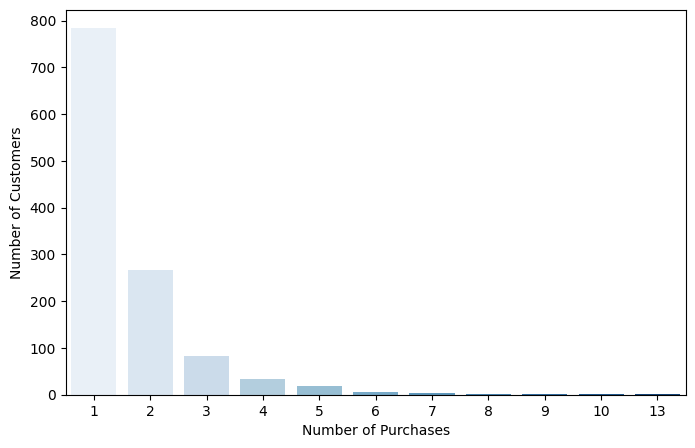

In [15]:
purchase_counts = df.groupby('customer_id').size()
plot_df = purchase_counts.value_counts().reset_index()
plot_df.columns = ["Number of Purchases", "Number of Customers"]

plt.figure(figsize=(8, 5))
sns.barplot(x="Number of Purchases", y="Number of Customers", data=plot_df, palette="Blues")
print (plot_df)

**here shows that near 800 of customers purchase only once and so on.**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Shake Shack'),
  Text(1, 0, 'The Meatball Shop'),
  Text(2, 0, 'Blue Ribbon Sushi'),
  Text(3, 0, 'Blue Ribbon Fried Chicken'),
  Text(4, 0, 'Parm'),
  Text(5, 0, 'RedFarm Broadway'),
  Text(6, 0, 'RedFarm Hudson'),
  Text(7, 0, 'TAO'),
  Text(8, 0, 'Han Dynasty'),
  Text(9, 0, 'Blue Ribbon Sushi Bar & Grill')])

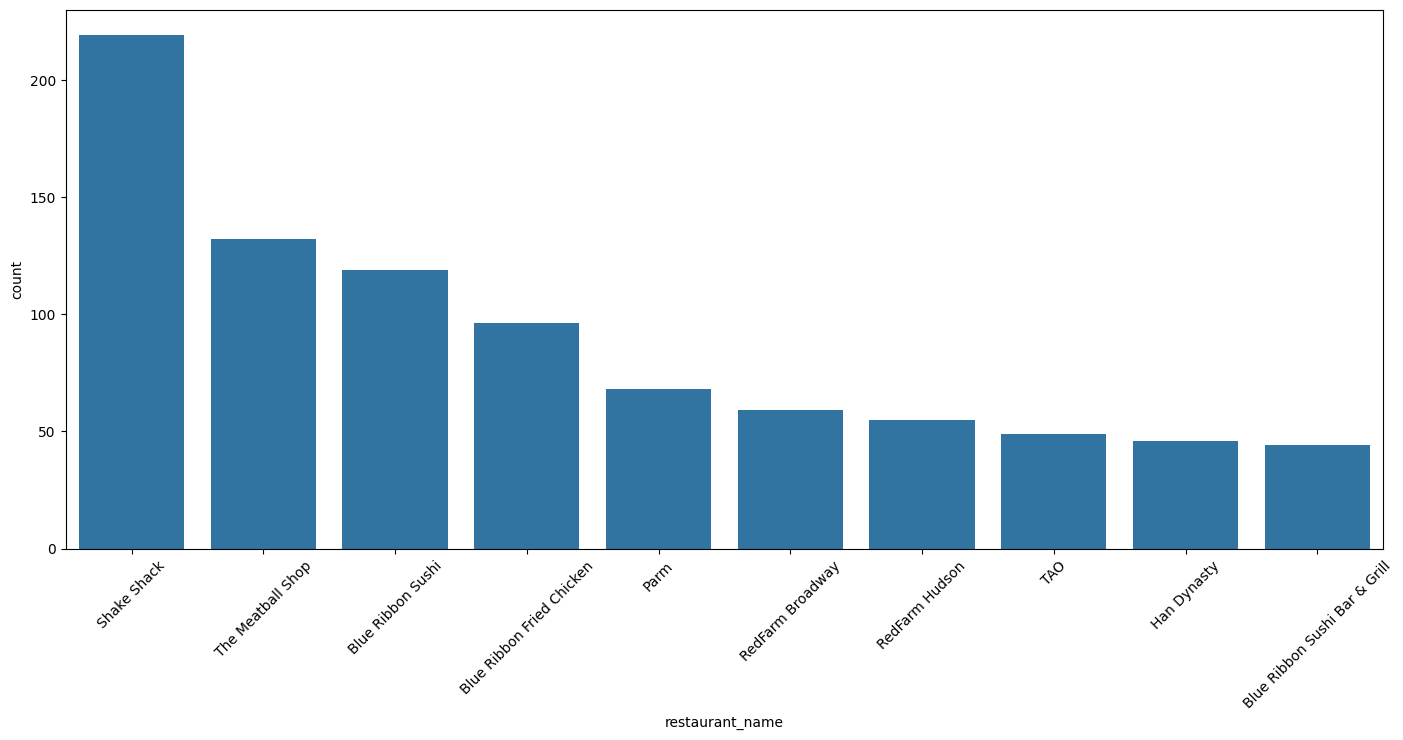

In [16]:
plt.subplots(figsize = (17,7))
sns.countplot(data = df, x = 'restaurant_name', order = df.restaurant_name.value_counts().iloc[:10].index)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'American'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Italian'),
  Text(3, 0, 'Chinese'),
  Text(4, 0, 'Mexican'),
  Text(5, 0, 'Indian'),
  Text(6, 0, 'Middle Eastern'),
  Text(7, 0, 'Mediterranean'),
  Text(8, 0, 'Thai'),
  Text(9, 0, 'French')])

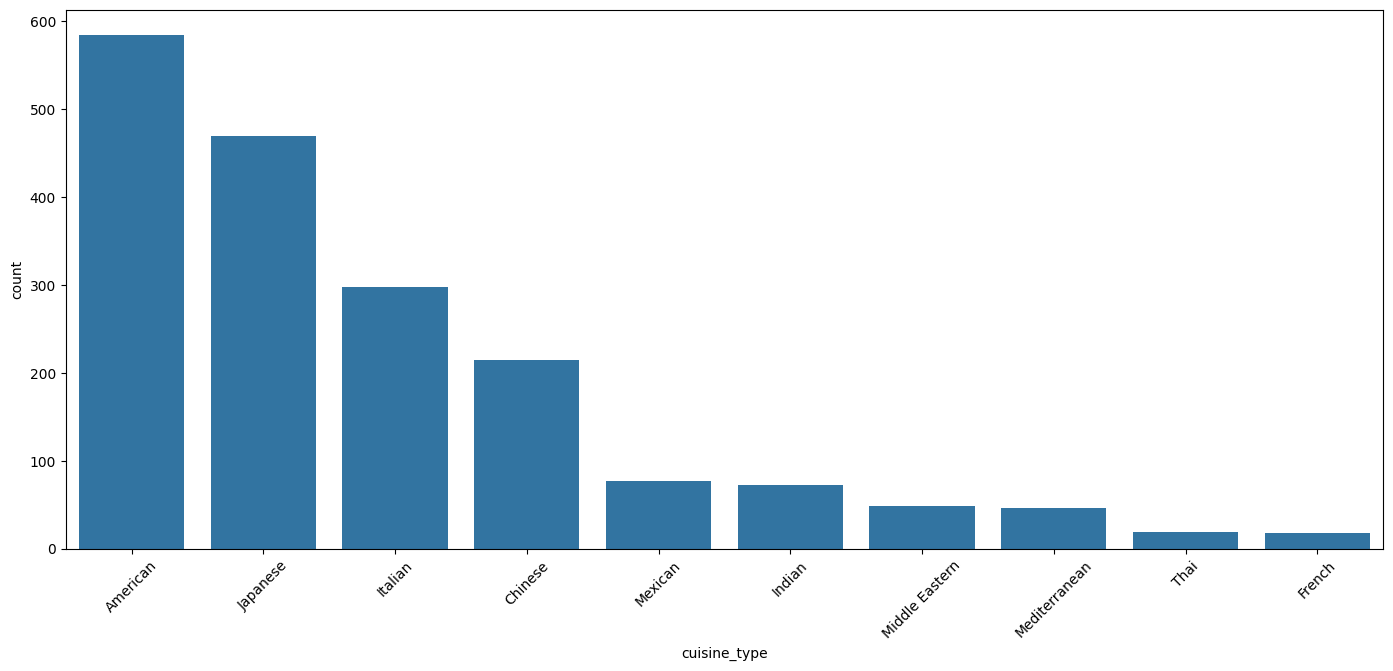

In [17]:
plt.subplots(figsize = (17,7))
sns.countplot(data = df, x = 'cuisine_type', order = df.cuisine_type.value_counts().iloc[:10].index)
plt.xticks(rotation=45)

the top cuisine type is American.

<Axes: xlabel='day_of_the_week', ylabel='count'>

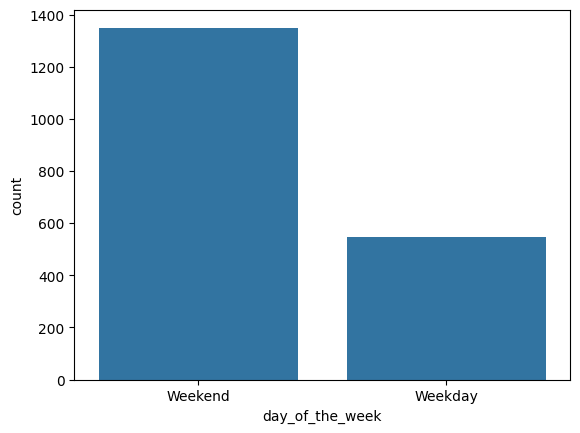

In [18]:
sns.countplot(data = df, x = 'day_of_the_week')

In [19]:
df ['day_of_the_week'].value_counts()

,count
day_of_the_week,
Weekend,1351
Weekday,547


the most of the orders are placed in weekend.

<Axes: xlabel='food_preparation_time', ylabel='Count'>

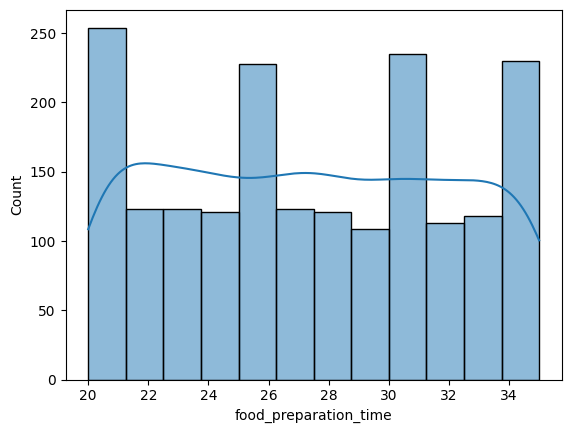

In [20]:

sns.histplot(data = df, x = 'food_preparation_time', kde = True)



<Axes: xlabel='food_preparation_time'>

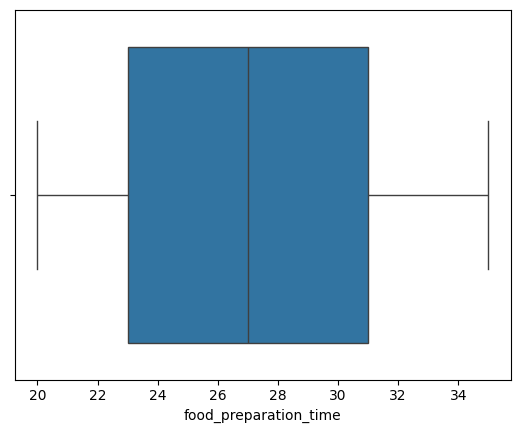

In [21]:
sns.boxplot(data = df, x = 'food_preparation_time')

the average time of preparation is about 27 minutes.
the min is 20 and the max is 35. but overall it shows pretty the same distribution. **bold text**

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [22]:
Restaurant_counts = df ['restaurant_name'].value_counts()
print (Restaurant_counts)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64


**the top 5 restaurant are : Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried chicken, Parm.**

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [23]:
df.groupby(['day_of_the_week'])['cuisine_type'].value_counts()

day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Indian             24
                 Mexican            24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean             11
                 Southern           11
                 Spanish            11
                 Vietnamese          4
Name: count, dtype: int64

#### Observations:
American food is the most popular in weekend. after that is Japanese, Italian and Chinese are the most popular. **bold text**

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [24]:
# Write the code here
num_order_above_20 = df[df['cost_of_the_order']>20].shape[0]
total_orders = df.shape[0]
percentage = (num_order_above_20 / total_orders)*100
print (f"{percentage} is above $20")

29.24130663856691 is above $20


#### Observations:
29 percent of orders was above $20. **bold text**

### **Question 10**: What is the mean order delivery time? [1 mark]

In [25]:
# Write the code here
mean_delivery_time = df['delivery_time'].mean()
print (f"the mean order delivery time is: {mean_delivery_time} minutes")

the mean order delivery time is: 24.161749209694417 minutes


#### Observations:
mean delivery time is 24 minutes. **bold text**

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [26]:
# Write the code here
customer_order_counts= df['customer_id'].value_counts().reset_index()
customer_order_counts.columns = ["customer_id","number of orders"]
top_3_customer= customer_order_counts.head(3)
print("top 3 most frequent customers:")
print(top_3_customer)

top 3 most frequent customers:
   customer_id  number of orders
0        52832                13
1        47440                10
2        83287                 9


#### Observations:
the customer id of 52832 has the most orders which is 13 times. **bold text**

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [30]:

sns.heatmap(data = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time' ,'rating']].corr(), annot= True,cmap= 'YlGnBu');

ValueError: could not convert string to float: 'Not given'

**This heat map shows that there no such a corrolation between cost of the order, food peparation time , delivery time and rating. **

<Axes: xlabel='day_of_the_week', ylabel='cost_of_the_order'>

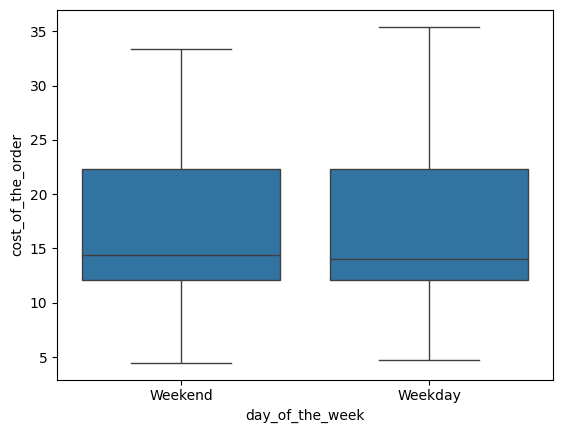

In [31]:
sns.boxplot(data=df,x='day_of_the_week',y='cost_of_the_order',showfliers=False)

The median is pretty the same for weekend and weekday.
Q1 and Q3 is a bit longer for week day. **bold text**

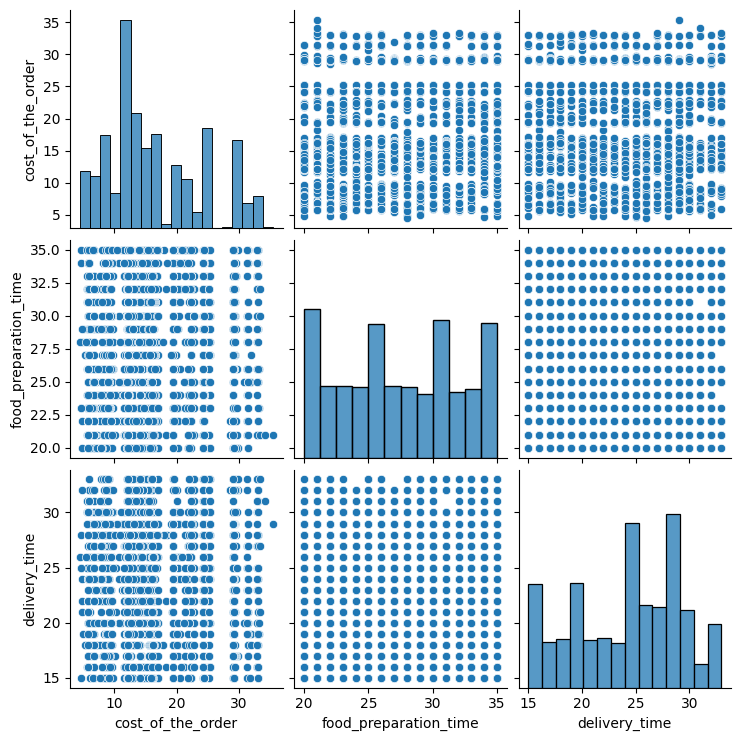

In [32]:
sns.pairplot(data=df[['cost_of_the_order','food_preparation_time','rating','delivery_time']])

**this type of plot cannot give so much information.**

<Axes: xlabel='restaurant_name', ylabel='cost_of_the_order'>

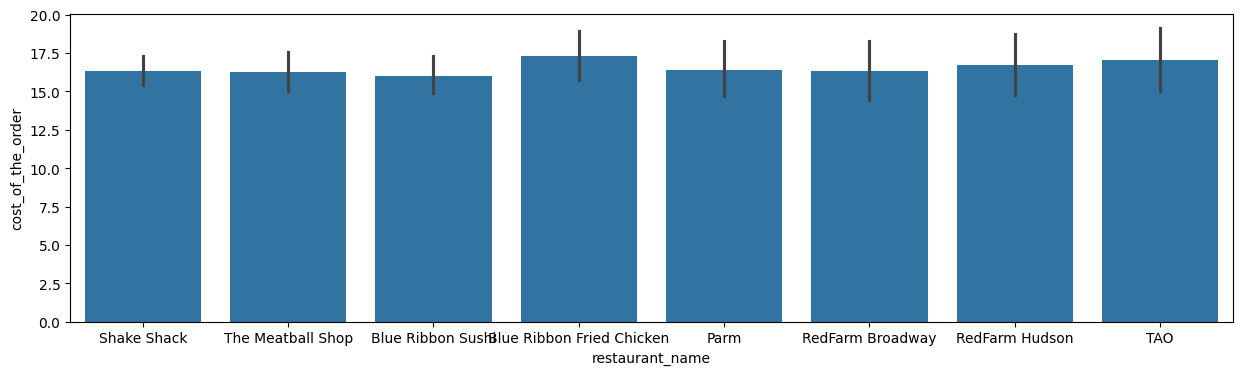

In [33]:
plt.figure(figsize = (15,4))
sns.barplot(data = df, x = 'restaurant_name', y = 'cost_of_the_order',
            order = df.restaurant_name.value_counts().iloc[:8].index)

**Cost of the order is pretty the same in most of the top restuarants.**

<Axes: xlabel='cuisine_type', ylabel='count'>

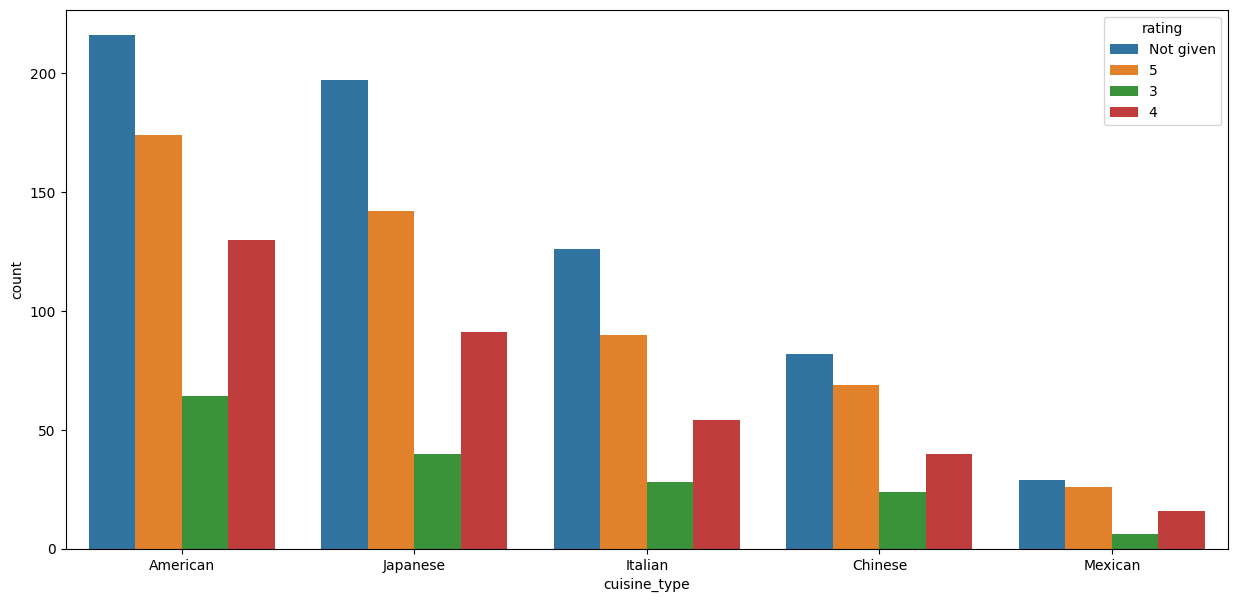

In [34]:
plt.figure(figsize = (15,7))
sns.countplot(data = df, x = 'cuisine_type', hue = 'rating', order = df.cuisine_type.value_counts().iloc[:5].index)

**Between the five top cuisin type, American has the highest number of orders.**

<Axes: xlabel='day_of_the_week', ylabel='delivery_time'>

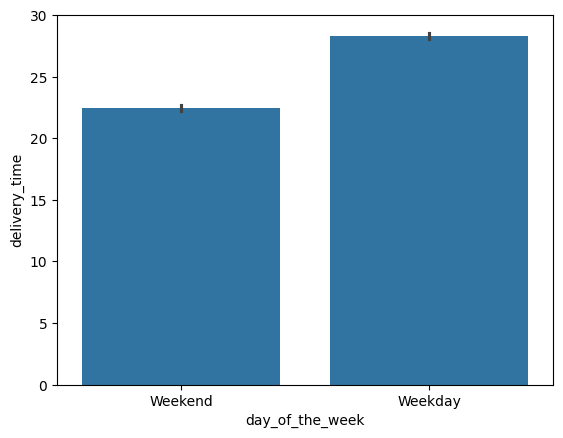

In [35]:
sns.barplot(data = df, x = 'day_of_the_week', y = 'delivery_time')

**Delivery time in Weekday is longer.**

<Axes: xlabel='cost_of_the_order', ylabel='Count'>

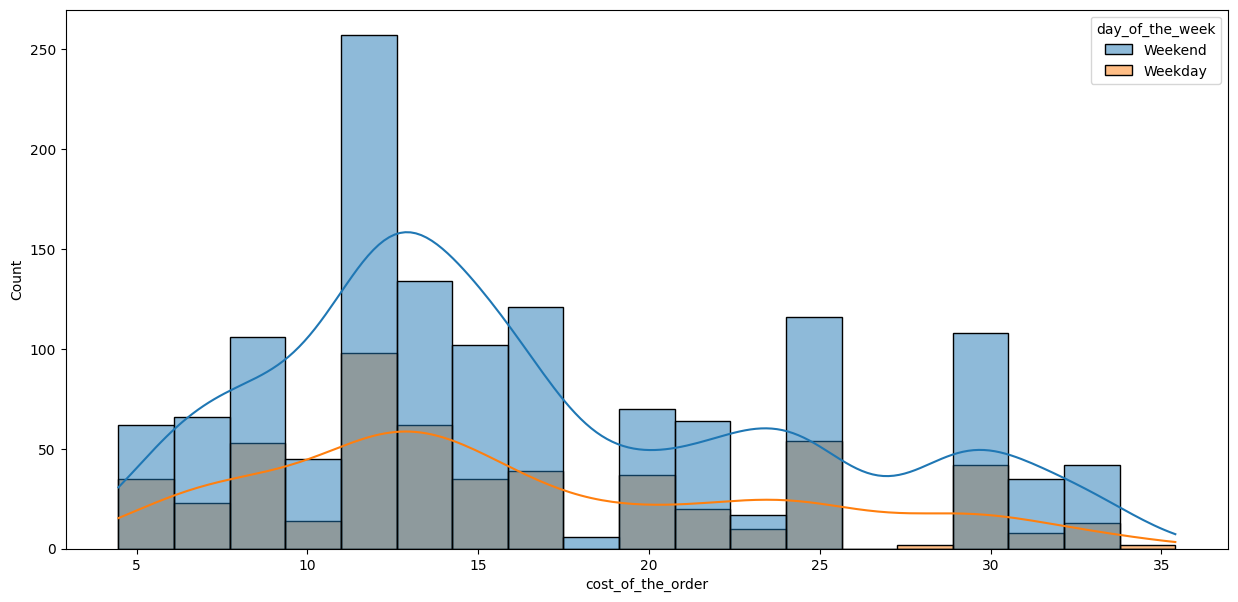

In [36]:
plt.figure(figsize = (15,7))
sns.histplot(data = df, x = 'cost_of_the_order', hue = 'day_of_the_week', kde = True)

**This histogram shows that most of the orders placed in weekend.**

<Axes: xlabel='rating', ylabel='cost_of_the_order'>

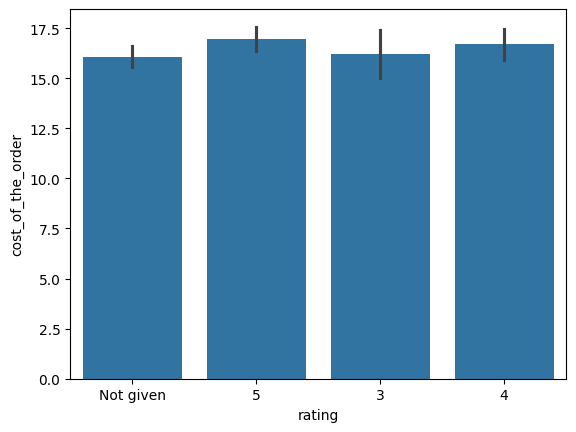

In [37]:
sns.barplot(data = df, x = 'rating', y = 'cost_of_the_order')

**This graph indicate higher rating resturant has higher cost of order.**

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [38]:
# Write the code here
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
resturant_rate = df.groupby('restaurant_name').agg(
    rating_count = ('rating','count'),
    Average_rating = ('rating','mean')
).reset_index()
eligible = resturant_rate [(resturant_rate['rating_count']>50) & (resturant_rate['Average_rating']>4)]
print(eligible)

               restaurant_name  rating_count  Average_rating
20   Blue Ribbon Fried Chicken            64        4.328125
21           Blue Ribbon Sushi            73        4.219178
136                Shake Shack           133        4.278195
153          The Meatball Shop            84        4.511905


#### Observations:
**They all have more than 50 rating and above 4 average of their rating.**

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [39]:
# Write the code here
def calculate_commission(cost_of_the_order):
  if cost_of_the_order >20:
    return cost_of_the_order*0.25
  elif cost_of_the_order >5:
    return cost_of_the_order *0.15
  else:
    return 0

df['commission']= df['cost_of_the_order'].apply(calculate_commission)
total_revenue= df['commission'].sum()
print(f"total net revenue generated by the company:$ {total_revenue}")

total net revenue generated by the company:$ 6166.303


#### Observations:
**The company net revenue is $6166. **

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [40]:
# Write the code here
df['total_time']= df['food_preparation_time'] +df['delivery_time']
orders_above_60 = df[df['total_time']>60].shape[0]
total_orders= df.shape[0]
percentage_above_60 = (orders_above_60/total_orders)*100
print(f"{percentage_above_60} % of orders take more than 60 minutes to get delivered.")

10.537407797681771 % of orders take more than 60 minutes to get delivered.


10 % of all the orders take more than 60 minutes to delivered.**


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [41]:
# Write the code here


mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean()
print("Mean delivery time for weekend and weekday are:")
print(mean_delivery_time)

Mean delivery time for weekend and weekday are:
day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations:
the average of delivery time in weekday is longer. it means that delivery in weekend is faster. **bold text**

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*
1-the data set has 1898 raws and 9 columns.
2-most of the customers just order one time from this app (around 784 person).
3- there is 1200 unique customers.
4- delivery time is faster in weekend.
5- price is lower in weekday.
6- American cuisin is top one between all the different type of cuisine.


### Recommendations:

*  1- As most of customers used just once from software, they can give them vouchers, to encourage them for next orders.
2- as the rate of orders is higher on weekend, increase the number of delivery man, to decrease delivery time.
3- the most popular cuisine is American, try to increase number of resturant from this type.
4- they can give some coupon for just ordering in weekday as the number of orders are less in weekday incompare to weekend.

In [1]:
!pip install nbconvert

In [ ]:
!jupyter nbconvert --to html "your_notebook_name.ipynb"

---